# Prediction March Madness

## Import Libs

In [1]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt 
import numpy as np # n-dim object support
# do ploting inline instead of in a separate window
%matplotlib inline
import random

## Load and review data

In [2]:
df_team = pd.read_csv("data/team_yearly_stats.csv")
df_ps_game = pd.read_csv("data/post_season_games.csv")

In [3]:
df_ps_game.shape

(629, 7)

In [4]:
df_team.shape

(4211, 21)

In [5]:
df_team.head(5)

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2011.0,Air Force,22.562500,13.062500,6.625000,5.843750,28.504883,15.437500,6.250000,2.593750,...,17.593750,64.812500,65.062500,0.471,0.377,0.705,0.500,0.375000,2.71,3.31
1,2011.0,Akron,24.777778,12.694444,7.861111,10.083333,34.108796,14.444444,6.666667,3.583333,...,19.222222,70.111111,65.694444,0.430,0.361,0.704,0.639,0.562500,2.15,-1.02
2,2011.0,Alabama A&M,22.607143,14.892857,4.464286,12.392857,37.343112,12.107143,8.321429,5.392857,...,20.071429,64.571429,66.785714,0.396,0.288,0.624,0.464,0.555556,-15.19,-11.75
3,2011.0,Alabama-Birmingham,24.387097,11.870968,7.709677,11.354839,35.407908,13.548387,5.290323,3.129032,...,16.580645,68.354839,62.580645,0.438,0.342,0.717,0.710,0.750000,8.55,2.78
4,2011.0,Alabama State,20.800000,15.000000,4.714286,13.142857,35.938776,11.542857,7.285714,4.657143,...,22.200000,61.314286,63.828571,0.395,0.283,0.603,0.486,0.611111,-13.37,-10.31


In [6]:
df_ps_game.head(5)

,year,team_1_name,team_1_score,team_1_seed,team_2_name,team_2_score,team_2_seed
0,2011,UTSA,46.0,16.0,Ohio State,75.0,1.0
1,2011,Villanova,57.0,9.0,George Mason,61.0,8.0
2,2011,Clemson,76.0,12.0,West Virginia,84.0,5.0
3,2011,Princeton,57.0,13.0,Kentucky,59.0,4.0
4,2011,Xavier,55.0,6.0,Marquette,66.0,11.0


## Check for nulls

In [7]:
df_team.isnull().values.any()

False

In [8]:
df_ps_game.isnull().values.any()

False

## How to query the dataframes for specific column values

In [9]:
df_team[(df_team['year'] == 2011) & (df_team['team_name'] == "Air Force")]

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2011.0,Air Force,22.5625,13.0625,6.625,5.84375,28.504883,15.4375,6.25,2.59375,...,17.59375,64.8125,65.0625,0.471,0.377,0.705,0.5,0.375,2.71,3.31


## Get team stats for post-season games

In [10]:
import shared
ps_team_stats_df = shared.get_team_stats_df(df_team, df_ps_game, True)

2011
LIU
2011
UNC Asheville
2012
UNC Asheville
2012
LIU
2012
Long Beach State
2012
NC State
2012
NC State
2012
NC State
2013
NC State
2013
California
2013
California
2014
NC State
2015
NC State
2015
NC State
2015
NC State
2016
UNC Wilmington
2016
California
2016
UNC Asheville
2017
UNC Wilmington
2018
Penn
2018
NC State
2018
TCU
2018
UMBC
2018
UMBC


In [11]:
ps_team_stats_df.head(5)

,team_name_1,fg_pg_1,ft_pg_1,three_pt_pg_1,orb_pg_1,drb_pg_1,ast_pg_1,stl_pg_1,blk_pg_1,tov_pg_1,...,pt_pg_2,opnt_pt_pg_2,fg_pct_2,three_p_pct_2,ft_pct_2,wl_pct_2,conf_wl_pct_2,srs_2,sos_2,t1_win
0,Texas-San Antonio,23.588235,16.058824,6.882353,10.647059,34.569204,12.647059,7.058824,2.235294,13.558824,...,77.135135,59.675676,0.494,0.423,0.701,0.919,0.888889,25.84,8.38,False
1,Villanova,24.121212,17.636364,6.363636,12.181818,36.691460,13.636364,6.303030,3.787879,11.878788,...,72.764706,62.470588,0.471,0.395,0.689,0.794,0.888889,11.66,1.37,False
2,Clemson,23.823529,14.500000,6.382353,11.294118,34.285467,13.088235,8.000000,4.735294,13.205882,...,69.787879,64.666667,0.429,0.337,0.711,0.636,0.611111,16.15,11.03,False
3,Princeton,24.625000,13.937500,6.031250,9.843750,34.223633,13.343750,5.968750,4.187500,12.156250,...,74.868421,63.473684,0.459,0.397,0.710,0.763,0.625000,20.30,8.91,False
4,Xavier,24.500000,17.656250,5.406250,10.250000,34.992188,13.250000,5.437500,3.062500,12.062500,...,75.189189,68.810811,0.465,0.349,0.696,0.595,0.500000,14.89,8.51,False


## Concat the team stats with the post-season game data

In [12]:
ps_game_w_team_stats = pd.concat([df_ps_game, ps_team_stats_df], axis=1, join='inner')

In [13]:
ps_game_w_team_stats.head(3)

,year,team_1_name,team_1_score,team_1_seed,team_2_name,team_2_score,team_2_seed,team_name_1,fg_pg_1,ft_pg_1,...,pt_pg_2,opnt_pt_pg_2,fg_pct_2,three_p_pct_2,ft_pct_2,wl_pct_2,conf_wl_pct_2,srs_2,sos_2,t1_win
0,2011,UTSA,46.0,16.0,Ohio State,75.0,1.0,Texas-San Antonio,23.588235,16.058824,...,77.135135,59.675676,0.494,0.423,0.701,0.919,0.888889,25.84,8.38,False
1,2011,Villanova,57.0,9.0,George Mason,61.0,8.0,Villanova,24.121212,17.636364,...,72.764706,62.470588,0.471,0.395,0.689,0.794,0.888889,11.66,1.37,False
2,2011,Clemson,76.0,12.0,West Virginia,84.0,5.0,Clemson,23.823529,14.500000,...,69.787879,64.666667,0.429,0.337,0.711,0.636,0.611111,16.15,11.03,False


In [14]:

ps_game_w_team_stats.shape

(605, 48)

## Check true/false ration

In [15]:
t1_win_map = {True:1, False:0}
ps_game_w_team_stats['t1_win'] = ps_game_w_team_stats['t1_win'].map(t1_win_map)
num_true = len(ps_game_w_team_stats.loc[ps_game_w_team_stats['t1_win'] == True])
num_false = len(ps_game_w_team_stats.loc[ps_game_w_team_stats['t1_win'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

Number of True cases: 297 (49.09%)
Number of False cases: 308 (50.91%)


## Setup training, validation, and testing splits

In [16]:
import sklearn.model_selection

ps_predict_class_names = ['t1_win']
ps_x = ps_game_w_team_stats[shared.ps_feature_col_names].values
ps_y = ps_game_w_team_stats[shared.ps_predict_class_names].values
split_test_size = 0.30

ps_x_train, ps_x_test, ps_y_train, ps_y_test = sklearn.model_selection.train_test_split(ps_x, ps_y, test_size=split_test_size, random_state=42)

In [17]:
print("{0:0.2f}% in training set".format((len(ps_x_train)/len(ps_game_w_team_stats.index))*100))
print("{0:0.2f}% in test set".format((len(ps_x_test)/len(ps_game_w_team_stats.index))*100))

69.92% in training set
30.08% in test set


## Imput with the mean

In [18]:
import sklearn.impute

#Impute with mean all 0 readings
fill_0 = sklearn.impute.SimpleImputer(missing_values=0, strategy="mean")

ps_x_train = fill_0.fit_transform(ps_x_train)
ps_x_test = fill_0.fit_transform(ps_x_test)

# TODO : impute incorrect negative values such anything other than (SOS and SRS

## Training Baive Bayes mode

In [19]:
from sklearn.naive_bayes import GaussianNB

ps_nb_model = GaussianNB()
ps_nb_model.fit(ps_x_train, ps_y_train.ravel())

GaussianNB()

### Perfrormance on Testing Data

In [20]:

ps_nb_predict_test = ps_nb_model.predict(ps_x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_nb_predict_test)))

Accuracy: 0.7473


In [21]:
print("Ps - Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(ps_y_test, ps_nb_predict_test, labels=[1, 0])))
print("")

print("PS -Classification Report")
print(metrics.classification_report(ps_y_test, ps_nb_predict_test, labels=[1, 0]))

Ps - Confusion Matrix
[[67 15]
 [31 69]]

PS -Classification Report
              precision    recall  f1-score   support

           1       0.68      0.82      0.74        82
           0       0.82      0.69      0.75       100

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.76      0.75      0.75       182



## Random Forsest

In [22]:
from sklearn.ensemble import RandomForestClassifier
ps_rf_model = RandomForestClassifier(random_state=42)
ps_rf_model.fit(ps_x_train, ps_y_train.ravel())

RandomForestClassifier(random_state=42)

In [23]:
ps_rf_predict_test = ps_rf_model.predict(ps_x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_rf_predict_test))) # Will be low because of over-fitting

Accuracy: 0.7198


## Logistic Regression

/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

1st max valu of 0.756 occured at C=0.300


/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

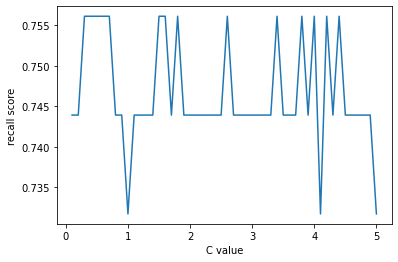

In [24]:
from sklearn.linear_model import LogisticRegression
# Setting up regularization Params
def get_best_score_C_val_for_LR(x_tr, y_tr, x_tst, y_tst):
    C_start = 0.1
    C_end = 5
    C_inc = 0.1
    C_values, recall_scores = [], []
    C_val = C_start
    best_recall_score = 0

    while (C_val < C_end):
        C_values.append(C_val)
        lr_model_loop = LogisticRegression(C=C_val, random_state=42)
        lr_model_loop.fit(x_tr, y_tr.ravel())
        lr_predict_loop_test = lr_model_loop.predict(x_tst)
        recall_score = metrics.recall_score(y_tst, lr_predict_loop_test)
        recall_scores.append(recall_score)
        if (recall_score > best_recall_score):
            best_recall_score = recall_score
            best_lr_predict_test = lr_predict_loop_test
        C_val = C_val + C_inc
    best_score_C_val = C_values[recall_scores.index(best_recall_score)]
    print("1st max valu of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
    %matplotlib inline
    plt.plot(C_values, recall_scores, "-")
    plt.xlabel("C value")
    plt.ylabel("recall score")
    return best_score_C_val
ps_best_score_C_val = get_best_score_C_val_for_LR(ps_x_train, ps_y_train, ps_x_test, ps_y_test)

In [25]:

ps_lr_model = LogisticRegression(class_weight="balanced", C=ps_best_score_C_val, random_state=42)
ps_lr_model.fit(ps_x_train, ps_y_train.ravel())


/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.30000000000000004, class_weight='balanced',
                   random_state=42)

In [26]:
ps_lr_predict_test = ps_lr_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, ps_lr_predict_test)))

Accuracy: {0:.4f} 0.6978021978021978


## Logistic Regression with Cross Validation

In [27]:
from sklearn.linear_model import LogisticRegressionCV
ps_lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced") #Set number of folds
ps_lr_cv_model.fit(ps_x_train, ps_y_train.ravel())


/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42)

In [28]:
ps_lr_cv_predict_test = ps_lr_cv_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, ps_lr_cv_predict_test)))

Accuracy: {0:.4f} 0.6978021978021978


## XG Boost

In [30]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV   #Perforing grid search

xgb_model = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model.fit(ps_x_train, ps_y_train.ravel())

/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:25:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=27, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [31]:
xgb_test = xgb_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, xgb_test)))

Accuracy: {0:.4f} 0.6758241758241759


In [32]:
# Optimize Hyper Parameters
param_test1 = {
 'max_depth':range(1,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(ps_x_train, ps_y_train.ravel())
gsearch1.best_score_, gsearch1.best_params_

/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Mul

/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 

/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 

/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 

/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 

[12:26:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(0.8000378143316317, {'max_depth': 5, 'min_child_weight': 1})

In [33]:
param_test2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=1,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(ps_x_train, ps_y_train.ravel())
gsearch2.best_score_, gsearch2.best_params_

/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 

[12:26:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 

(0.7876401156038139, {'gamma': 0.0})

In [33]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=1,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(ps_x_train, ps_y_train.ravel())
gsearch3.best_score_, gsearch3.best_params_

[09:30:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(0.8106722106722108, {'colsample_bytree': 0.9, 'subsample': 0.7})

In [34]:
param_test4 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=1,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(ps_x_train, ps_y_train.ravel())
gsearch4.best_score_, gsearch4.best_params_

[09:30:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/njp020/Library/Caches/pypoetry/virtualenvs/machinelearningmarchmadness-Ra9ZsL2z-py3.8/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


(0.8054054054054054, {'reg_alpha': 0})

In [34]:
xgb_model = xgb.XGBClassifier( learning_rate =0.01, n_estimators=500, max_depth=1,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.6, reg_alpha=.005,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb_model.fit(ps_x_train, ps_y_train.ravel())
xgb_test = xgb_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, xgb_test)))

[12:26:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: {0:.4f} 0.7417582417582418


# We have trained our models, not experiment with them to produce your bracket!

In [55]:
# Setup This years bracket regions
# TODO: automate this with the data received from the scraper from https://www.sports-reference.com/cbb/postseason/2021-ncaa.html
# Note: we are ignoring some of the play in teams since 16 seeds are not frequent upset candidates
team_names_south = [
    # south region
    ('Arizona', 1),('Hartford', 16),
    ('Seton Hall', 8), ('TCU', 9),
    ('Houston',5), ('UAB', 12),
    ('Illinois',4), ('Chattanooga', 13),
    ('Colorado State', 6), ("Michigan", 11),
    ('Tennessee',3), ('Longwood',14),
    ('Ohio State',7),('Loyola (IL)',10),
    ('Villanova',2), ('Delaware',15)
]
team_names_west = [
    # west region
    ('Gonzaga', 1),('Georgia State',16),
    ('Boise State', 8),('Memphis', 9),
    ('UConn',5), ('New Mexico State', 12),
    ('Arkansas',4), ('Vermont',13),
    ('Alabama',6),('Rutgers',11), 
    ('Texas Tech', 3),('Montana State', 14),
    ('Michigan State',7),('Davidson',10),
    ('Duke',2),('Cal State Fullerton',15)
]
team_names_east = [
    # east region
    ('Baylor',1),('Norfolk State',16), 
    ('UNC',8), ('Marquette',9),
    ("Saint Mary's",5), ('Indiana',12),
    ('UCLA',4), ('Akron',13),
    ('Texas',6), ('Virginia Tech',11),
    ('Purdue',3), ('Yale',14),
    ('Murray State',7), ('San Francisco',10),
    ('Kentucky', 2), ("St. Peter's",15)
]
team_names_midwest = [
    # mid-west region
    ('Kansas', 1),('Texas Southern', 16),
    ('San Diego State', 8), ('Creighton', 9),
    ('Iowa',5), ('Richmond', 12),
    ('Providence',4), ('South Dakota State', 13),
    ('LSU', 6), ('Iowa State', 11),
    ('Wisconsin',3), ('Colgate',14),
    ('USC',7),('Miami (FL)',10),
    ('Auburn',2), ('Jacksonville State',15)
]



In [56]:
'''
    Methods to add evaluating the predicted winners of matchups and subbrackets (A region or Final Four)
    To change the predictive model used, just change the model handed to "evaluate_winner(teams,sub_bracket_name, model)"
    found later in the notebook
'''
def get_matchup_winners(matchup_stats, teams, model, post_season):
    if(post_season):
        x_tourney = matchup_stats[shared.ps_feature_col_names].values
    else:
        x_tourney = matchup_stats[shared.feature_col_names].values
    y_tourney = model.predict(x_tourney)
    i = 0
    winners = []
    for y_val in y_tourney:
        t1_name, t1_seed = teams[i]
        t2_name, t2_seed = teams[i + 1]
        print(t1_name,t1_seed,' vs. ', t2_name,t2_seed,'(team 1 won=', y_val,')')
        if(y_val):
            winners.append((t1_name,t1_seed))
        else:
            winners.append((t2_name, t2_seed))
        i = i + 2
    return winners

def evaluate_winner(teams,sub_bracket_name, model):        
    remaining_teams = teams
    i = 1
    while(len(remaining_teams) > 1):
        post_season_stats = True
        print("---",sub_bracket_name," round ",i,"---")
        matchup_stats = shared.get_matchups_stats(df_team, remaining_teams, post_season_stats, 2022)
        remaining_teams = get_matchup_winners(matchup_stats,remaining_teams, model, post_season_stats)
        i = i + 1
    winner = remaining_teams[0]
    print('Winner of ',sub_bracket_name,':',winner)
    return winner


## Post Season Trained Logistic Regression Model results


In [57]:
# Get predicted final four
final_four = [evaluate_winner(team_names_east, "East",ps_lr_model), evaluate_winner(team_names_west,"West",ps_lr_model),
              evaluate_winner(team_names_south, "South",ps_lr_model), evaluate_winner(team_names_midwest, "MidWest",ps_lr_model)]


--- East  round  1 ---
Baylor 1  vs.  Norfolk State 16 (team 1 won= 1 )
UNC 8  vs.  Marquette 9 (team 1 won= 0 )
Saint Mary's 5  vs.  Indiana 12 (team 1 won= 1 )
UCLA 4  vs.  Akron 13 (team 1 won= 1 )
Texas 6  vs.  Virginia Tech 11 (team 1 won= 1 )
Purdue 3  vs.  Yale 14 (team 1 won= 1 )
Murray State 7  vs.  San Francisco 10 (team 1 won= 1 )
Kentucky 2  vs.  St. Peter's 15 (team 1 won= 1 )
--- East  round  2 ---
Baylor 1  vs.  Marquette 9 (team 1 won= 1 )
Saint Mary's 5  vs.  UCLA 4 (team 1 won= 0 )
Texas 6  vs.  Purdue 3 (team 1 won= 1 )
Murray State 7  vs.  Kentucky 2 (team 1 won= 0 )
--- East  round  3 ---
Baylor 1  vs.  UCLA 4 (team 1 won= 1 )
Texas 6  vs.  Kentucky 2 (team 1 won= 0 )
--- East  round  4 ---
Baylor 1  vs.  Kentucky 2 (team 1 won= 1 )
Winner of  East : ('Baylor', 1)
--- West  round  1 ---
Gonzaga 1  vs.  Georgia State 16 (team 1 won= 1 )
Boise State 8  vs.  Memphis 9 (team 1 won= 1 )
UConn 5  vs.  New Mexico State 12 (team 1 won= 1 )
Arkansas 4  vs.  Vermont 13 (team

## THE CHAMPION

In [58]:
champ = evaluate_winner(final_four, "FinalFour", ps_lr_model)

--- FinalFour  round  1 ---
Baylor 1  vs.  Texas Tech 3 (team 1 won= 1 )
Houston 5  vs.  LSU 6 (team 1 won= 1 )
--- FinalFour  round  2 ---
Baylor 1  vs.  Houston 5 (team 1 won= 1 )
Winner of  FinalFour : ('Baylor', 1)


In [59]:
champ

('Baylor', 1)

## XGBoost results


In [60]:
# Get predicted final four
final_four = [evaluate_winner(team_names_east, "East",xgb_model), evaluate_winner(team_names_west,"West",xgb_model),
              evaluate_winner(team_names_south, "South",xgb_model), evaluate_winner(team_names_midwest, "MidWest",xgb_model)]


--- East  round  1 ---
Baylor 1  vs.  Norfolk State 16 (team 1 won= 1 )
UNC 8  vs.  Marquette 9 (team 1 won= 1 )
Saint Mary's 5  vs.  Indiana 12 (team 1 won= 1 )
UCLA 4  vs.  Akron 13 (team 1 won= 1 )
Texas 6  vs.  Virginia Tech 11 (team 1 won= 1 )
Purdue 3  vs.  Yale 14 (team 1 won= 1 )
Murray State 7  vs.  San Francisco 10 (team 1 won= 1 )
Kentucky 2  vs.  St. Peter's 15 (team 1 won= 1 )
--- East  round  2 ---
Baylor 1  vs.  UNC 8 (team 1 won= 1 )
Saint Mary's 5  vs.  UCLA 4 (team 1 won= 0 )
Texas 6  vs.  Purdue 3 (team 1 won= 0 )
Murray State 7  vs.  Kentucky 2 (team 1 won= 0 )
--- East  round  3 ---
Baylor 1  vs.  UCLA 4 (team 1 won= 1 )
Purdue 3  vs.  Kentucky 2 (team 1 won= 0 )
--- East  round  4 ---
Baylor 1  vs.  Kentucky 2 (team 1 won= 1 )
Winner of  East : ('Baylor', 1)
--- West  round  1 ---
Gonzaga 1  vs.  Georgia State 16 (team 1 won= 1 )
Boise State 8  vs.  Memphis 9 (team 1 won= 1 )
UConn 5  vs.  New Mexico State 12 (team 1 won= 1 )
Arkansas 4  vs.  Vermont 13 (team 1 wo

In [61]:
champ = evaluate_winner(final_four, "FinalFour", xgb_model)

--- FinalFour  round  1 ---
Baylor 1  vs.  Gonzaga 1 (team 1 won= 0 )
Arizona 1  vs.  Auburn 2 (team 1 won= 0 )
--- FinalFour  round  2 ---
Gonzaga 1  vs.  Auburn 2 (team 1 won= 0 )
Winner of  FinalFour : ('Auburn', 2)


## Post Season Naive Baesean Model Results

In [64]:
# Get predicted final four
final_four = [evaluate_winner(team_names_east, "East",ps_nb_model), evaluate_winner(team_names_west,"West",ps_nb_model),
              evaluate_winner(team_names_south, "South",ps_nb_model), evaluate_winner(team_names_midwest, "MidWest",ps_nb_model)]

--- East  round  1 ---
Baylor 1  vs.  Norfolk State 16 (team 1 won= 1 )
UNC 8  vs.  Marquette 9 (team 1 won= 1 )
Saint Mary's 5  vs.  Indiana 12 (team 1 won= 1 )
UCLA 4  vs.  Akron 13 (team 1 won= 1 )
Texas 6  vs.  Virginia Tech 11 (team 1 won= 1 )
Purdue 3  vs.  Yale 14 (team 1 won= 1 )
Murray State 7  vs.  San Francisco 10 (team 1 won= 1 )
Kentucky 2  vs.  St. Peter's 15 (team 1 won= 1 )
--- East  round  2 ---
Baylor 1  vs.  UNC 8 (team 1 won= 1 )
Saint Mary's 5  vs.  UCLA 4 (team 1 won= 0 )
Texas 6  vs.  Purdue 3 (team 1 won= 0 )
Murray State 7  vs.  Kentucky 2 (team 1 won= 0 )
--- East  round  3 ---
Baylor 1  vs.  UCLA 4 (team 1 won= 1 )
Purdue 3  vs.  Kentucky 2 (team 1 won= 0 )
--- East  round  4 ---
Baylor 1  vs.  Kentucky 2 (team 1 won= 0 )
Winner of  East : ('Kentucky', 2)
--- West  round  1 ---
Gonzaga 1  vs.  Georgia State 16 (team 1 won= 1 )
Boise State 8  vs.  Memphis 9 (team 1 won= 1 )
UConn 5  vs.  New Mexico State 12 (team 1 won= 1 )
Arkansas 4  vs.  Vermont 13 (team 1 

In [65]:
champ = evaluate_winner(final_four, "FinalFour", ps_nb_model)

--- FinalFour  round  1 ---
Kentucky 2  vs.  Duke 2 (team 1 won= 0 )
Arizona 1  vs.  Auburn 2 (team 1 won= 0 )
--- FinalFour  round  2 ---
Duke 2  vs.  Auburn 2 (team 1 won= 0 )
Winner of  FinalFour : ('Auburn', 2)
